In [55]:
import json
import pandas as pd
import matplotlib.pyplot as plt


def load_result(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)
    data = { k1: { int(k2.replace("layer_", "")): v2["cka_mean"] for k2, v2 in v1.items() } for k1, v1 in data.items() }
    df = pd.DataFrame(data)
    df.sort_index(inplace=True)
    df = pd.concat([df, df.agg(["mean"], axis=1)], axis=1)
    return df


def print_result(df, title, langs=["es", "fr", "de", "zh", "ko", "ja", "tr", "hi", "ar"]):
    print("Mean CKA Score:", df["mean"].mean())
    print("Best CKA Score:", df["mean"].max())
    print("Best Layer:", df["mean"].idxmax())
    columns = [f"en_pud-{l}_pud" for l in langs] + ["mean"]
    df[columns].plot(title=title)
    plt.legend(loc=(1.05, 0.5))

Mean CKA Score: 0.4838165859308807
Best CKA Score: 0.6113219286355749
Best Layer: 0


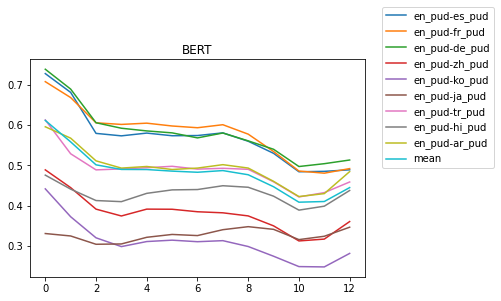

In [56]:
BERT_PATH = "res/bert-base-cased/cka-similarity-en_pud-trg.json"
bert_df = load_result(BERT_PATH)
print_result(bert_df, title="BERT")

Mean CKA Score: 0.4821001437618766
Best CKA Score: 0.6026000367367856
Best Layer: 0


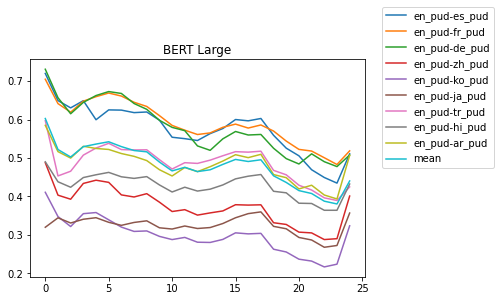

In [61]:
BERT_LARGE_PATH = "res/bert-large-cased/cka-similarity-en_pud-trg.json"
bert_large_df = load_result(BERT_LARGE_PATH)
print_result(bert_large_df, title="BERT Large")

Mean CKA Score: 0.7381325160416277
Best CKA Score: 0.808459096752911
Best Layer: 6


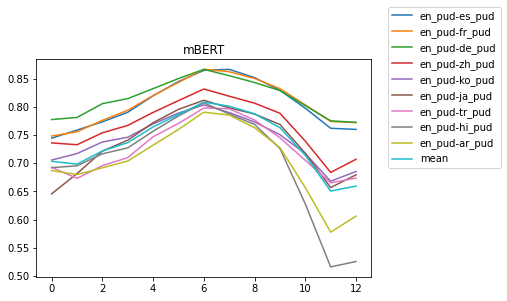

In [57]:
MBERT_PATH = "res/bert-base-multilingual-cased/cka-similarity-en_pud-trg.json"
mbert_df = load_result(MBERT_PATH)
print_result(mbert_df, title="mBERT")

Mean CKA Score: 0.6965460624707602
Best CKA Score: 0.8041346183810741
Best Layer: 2


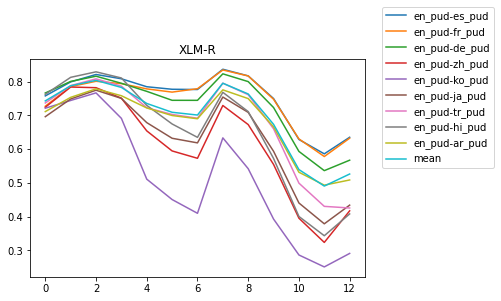

In [58]:
XLMR_PATH = "res/xlm-roberta-base/cka-similarity-en_pud-trg.json"
xlmr_df = load_result(XLMR_PATH)
print_result(xlmr_df, title="XLM-R")

Mean CKA Score: 0.7745447642198541
Best CKA Score: 0.8678432847728866
Best Layer: 11


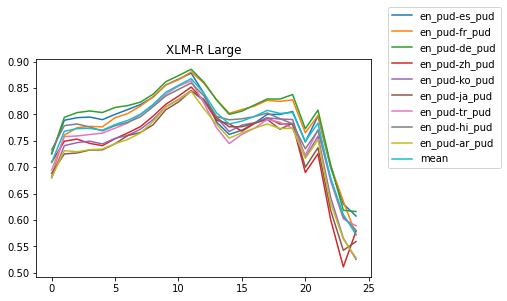

In [59]:
XLMR_LARGE_PATH = "res/xlm-roberta-large/cka-similarity-en_pud-trg.json"
xlmr_large_df = load_result(XLMR_LARGE_PATH)
print_result(xlmr_large_df, title="XLM-R Large")

XLM-R Large Mean CKA Score: 0.7745447642198541
mBERT Mean CKA Score: 0.7381325160416277
XLM-R Mean CKA Score: 0.6965460624707602
BERT Mean CKA Score: 0.4838165859308807
BERT Large Mean CKA Score: 0.4821001437618766

XLM-R Large Best CKA Score: 0.8678432847728866
mBERT Best CKA Score: 0.808459096752911
XLM-R Best CKA Score: 0.8041346183810741
BERT Best CKA Score: 0.6113219286355749
BERT Large Best CKA Score: 0.6026000367367856



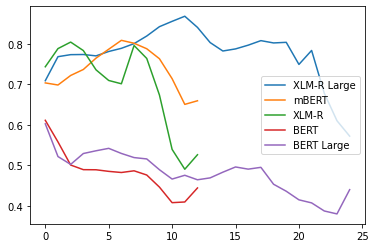

In [63]:
total_df = pd.DataFrame()
total_df["XLM-R Large"] = xlmr_large_df["mean"]
total_df["mBERT"] = mbert_df["mean"]
total_df["XLM-R"] = xlmr_df["mean"]
total_df["BERT"] = bert_df["mean"]
total_df["BERT Large"] = bert_large_df["mean"]
total_df.plot()

print("XLM-R Large Mean CKA Score:", xlmr_large_df["mean"].mean())
print("mBERT Mean CKA Score:", mbert_df["mean"].mean())
print("XLM-R Mean CKA Score:", xlmr_df["mean"].mean())
print("BERT Mean CKA Score:", bert_df["mean"].mean())
print("BERT Large Mean CKA Score:", bert_large_df["mean"].mean())
print()

print("XLM-R Large Best CKA Score:", xlmr_large_df["mean"].max())
print("mBERT Best CKA Score:", mbert_df["mean"].max())
print("XLM-R Best CKA Score:", xlmr_df["mean"].max())
print("BERT Best CKA Score:", bert_df["mean"].max())
print("BERT Large Best CKA Score:", bert_large_df["mean"].max())
print()